In [155]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [203]:
image = cv.imread('Data/micronnav.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image_size = gray.shape
memory_size = np.prod(image_size)

print('Image {}x{} pixels, {} KB'.format(image_size[0], image_size[1], memory_size/1024))

Image 280x400 pixels, 109.375 KB


In [215]:
threshold = 0.01
haris_corners = cv.cornerHarris(gray, 2, 3, 0.04)
dilated = cv.dilate(haris_corners, None)
ret, selected = cv.threshold(dilated, threshold * dilated.max(), 255, 0)

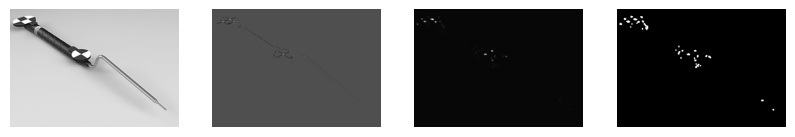

In [216]:
plt.figure(figsize=(10,10))

for i, img in enumerate([gray, haris_corners, dilated, selected]):
    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

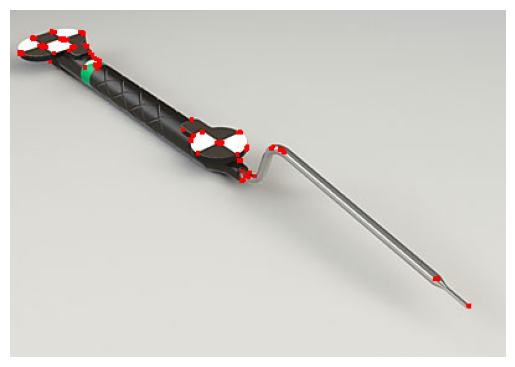

In [217]:
display_image = image.copy()
display_image[dilated >= threshold * dilated.max()] = [255, 0, 0]
plt.imshow(display_image)
plt.axis('off')
plt.show()

In [218]:
selected = selected.astype(np.uint8)
ret, labels, stats, centroids = cv.connectedComponentsWithStats(selected)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 300, 0.001)
corners = cv.cornerSubPix(gray, np.float32(centroids[1:]), (5, 5), (-1, -1), criteria)

(-0.5, 399.5, 279.5, -0.5)

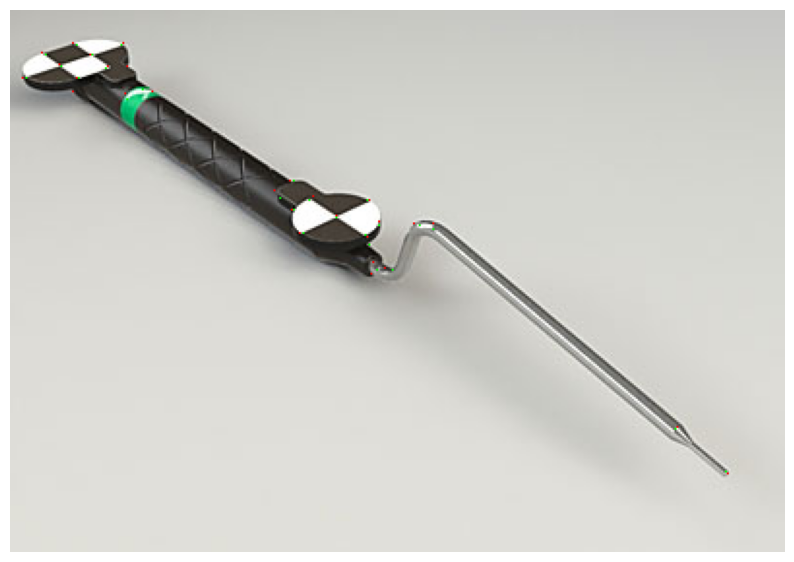

In [219]:
display_image = image.copy()

for i, original, corner in zip(range(len(corners)), centroids[1:], corners):
    cv.circle(display_image, np.int32(original), 0, (0, 255, 0), 0)
    cv.circle(display_image, np.int32(corner), 0, (255, 0, 0), 0)

plt.figure(figsize=(10,10))
plt.imshow(display_image)
plt.axis('off')